## Edge flow denoising


In [1]:
# # Uncomment the following lines to run the notebook in the root directory of the repository
# import os

# # set the current working directory
# curr_path = os.getcwd().split("/")[:-2]
# curr_path = "/".join(curr_path)
# os.chdir(curr_path)

In [2]:

import numpy as np
import matplotlib.pyplot as plt

from pytspl import load_dataset, SCPlot

# load the dataset
sc, coordinates, flow = load_dataset("paper")

# create a plot
scplot = SCPlot(sc, coordinates)

(CVXPY) Aug 07 05:18:25 PM: Encountered unexpected exception importing solver ECOS:
ImportError("dlopen(/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/pytspl/thesis_venv/lib/python3.11/site-packages/_ecos.cpython-311-darwin.so, 0x0002): tried: '/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/pytspl/thesis_venv/lib/python3.11/site-packages/_ecos.cpython-311-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64')), '/System/Volumes/Preboot/Cryptexes/OS/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/pytspl/thesis_venv/lib/python3.11/site-packages/_ecos.cpython-311-darwin.so' (no such file), '/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/pytspl/thesis_venv/lib/python3.11/site-packages/_ecos.cpython-311-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64'))")
(CVXPY) Aug 07 05:18:25 PM: Encountered unexpected exception importing solver SCS:
ImportError("dlopen(/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/pyts

In [3]:
from pytspl.decomposition.eigendecomposition import get_eigendecomposition

L1 = sc.hodge_laplacian_matrix(rank=1).toarray()

u1, eigenvals = get_eigendecomposition(L1)

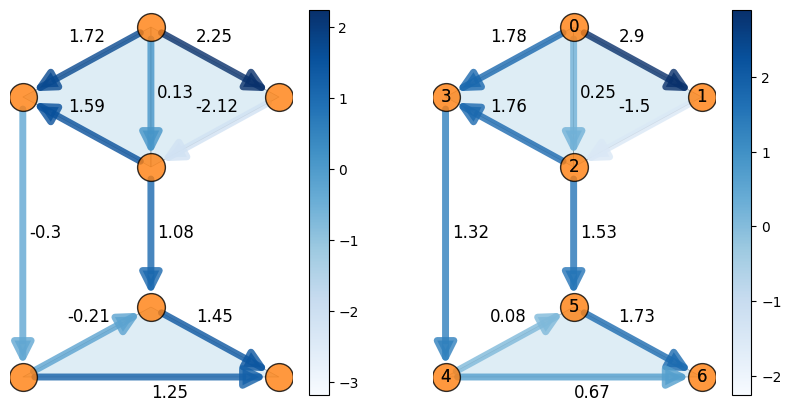

In [4]:

f0 = np.asarray(list(flow.values()))
f = [2.90, 0.25, 1.78, -1.50, 1.76, 1.53, 1.32,  0.08, 0.67, 1.73]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
scplot.draw_network(edge_flow=np.round(f0, 2), ax=ax[0])
scplot.draw_network(edge_flow=np.round(f, 2), ax=ax[1])

mu: 0.5, error: 0.7024


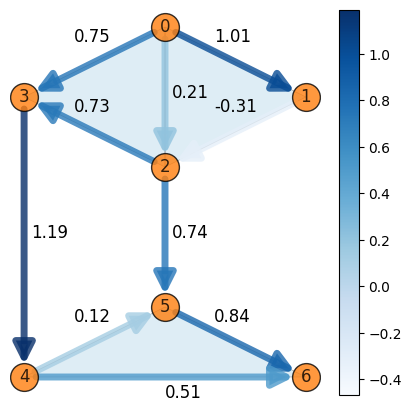

In [5]:
from pytspl.filters import EdgeFlowDenoising

# define the mu values
mu_vals = [0.5]

# denoise the edge flow with 
efd = EdgeFlowDenoising(sc)
efd.denoise(f=f, f_true=f0, mu_vals=mu_vals, p_choice="L1")

f_est_L1 = efd.history["f_estimated"]

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
scplot.draw_network(edge_flow=np.round(f_est_L1, 2), ax = ax)

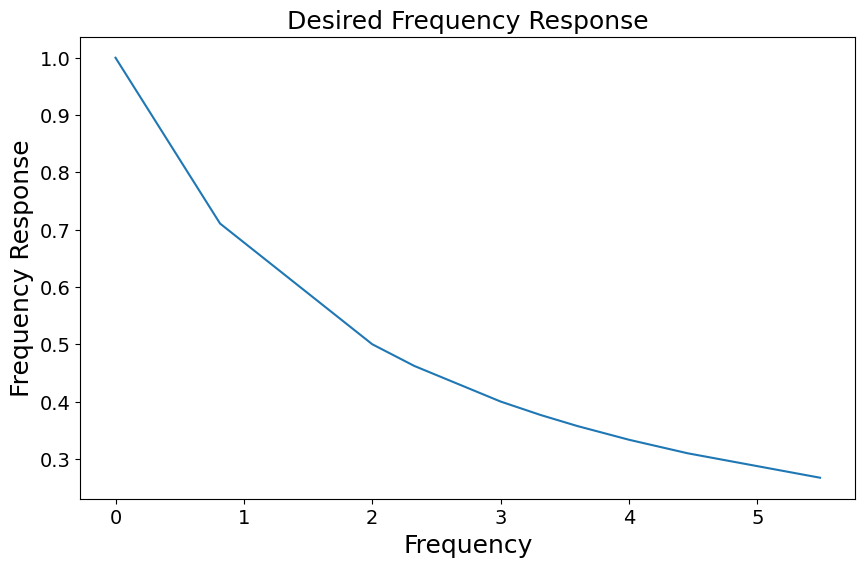

In [6]:
efd.plot_desired_frequency_response(p_choice="L1")

mu: 0.5, error: 0.7309


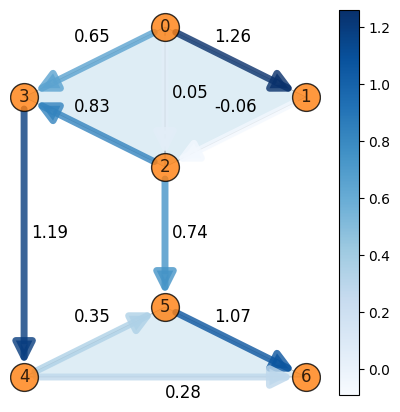

In [7]:
efd.denoise(f=f, f_true=f0, mu_vals=mu_vals, p_choice="L1L")

f_est_L1 = efd.history["f_estimated"]

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
scplot.draw_network(edge_flow=np.round(f_est_L1, 2), ax = ax)